In [1]:
import requests
import json
import pandas as pd


# import style dims
url = 'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/style_dims_names.json'

# Fetch the JSON file content
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    try:
        # Load the content into a list
        style_dims_names = json.loads(response.text)
        print("Data loaded successfully:")
    except json.JSONDecodeError as e:
        print(f"Failed to decode JSON: {e}")
else:
    print(f"Failed to fetch JSON file: {response.status_code}")

# import fighter data
all_fighter_data = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/blob/main/data/02_intermediate/fighter_data.csv?raw=true')


#import fihgt styles dims
fighters_styles_dims = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/fighters_styles_dims.csv')
fighters_styles_dims = fighters_styles_dims.dropna()

Data loaded successfully:


In [2]:
# aggregate data at the fighter level


In [3]:
# import numpy as np
# from ydata_profiling import ProfileReport

# # profile report
# profile = ProfileReport(fighter_df, minimal=True)
# profile.to_file(r"C:\Users\johna\anaconda3\envs\ufc-env\ufc_styles\data\03_reports\fighter_profile_report.html")

In [4]:
import os
import sys
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.dirname(notebook_dir)

if project_dir not in sys.path:
    sys.path.append(project_dir)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fighters_styles_dims_copy = fighters_styles_dims.copy()
fighters_styles_dims_copy.loc[:, style_dims_names] = scaler.fit_transform(fighters_styles_dims_copy[style_dims_names])
fighters_styles_dims = fighters_styles_dims_copy


In [6]:
weight_class = list(fighters_styles_dims['weight_class'].drop_duplicates())
weight_class

['Bantamweight',
 'Flyweight',
 'Middleweight',
 'Welterweight',
 'Lightweight',
 'LightHeavyweight',
 'Heavyweight',
 'WomenStrawweight',
 'Featherweight',
 'CatchWeight',
 'WomenFlyweight',
 'WomenBantamweight',
 'WomenFeatherweight',
 'OpenWeight']

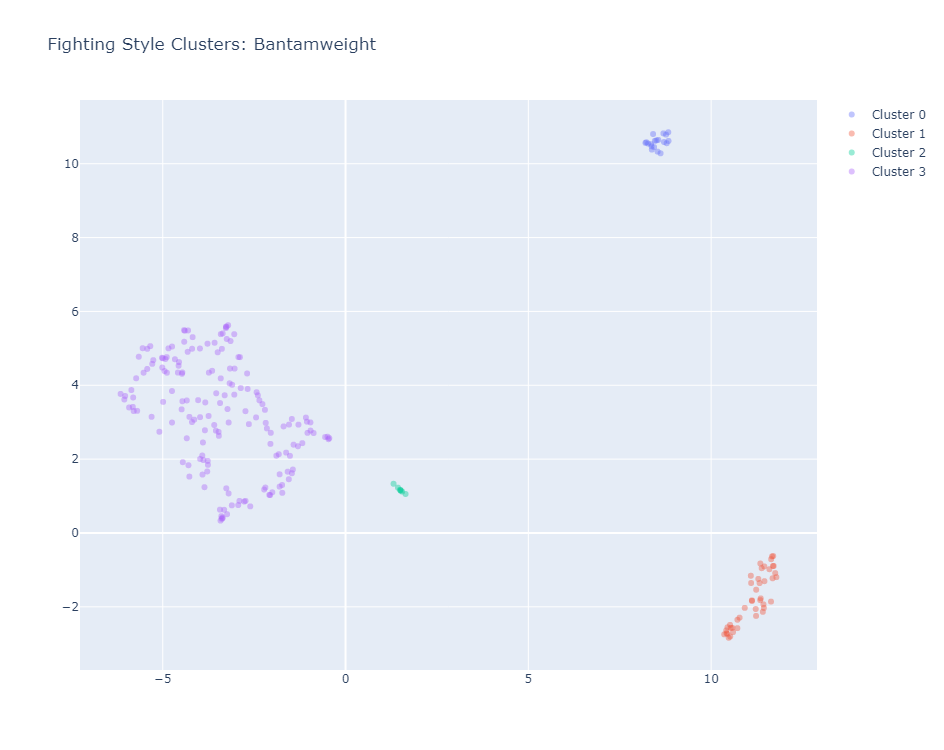

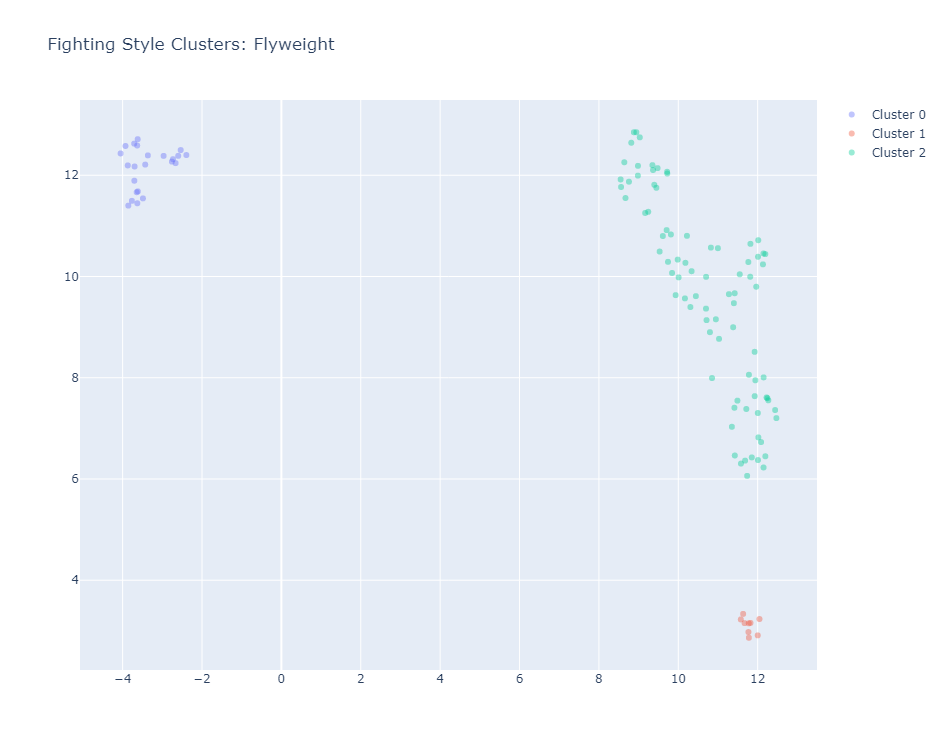

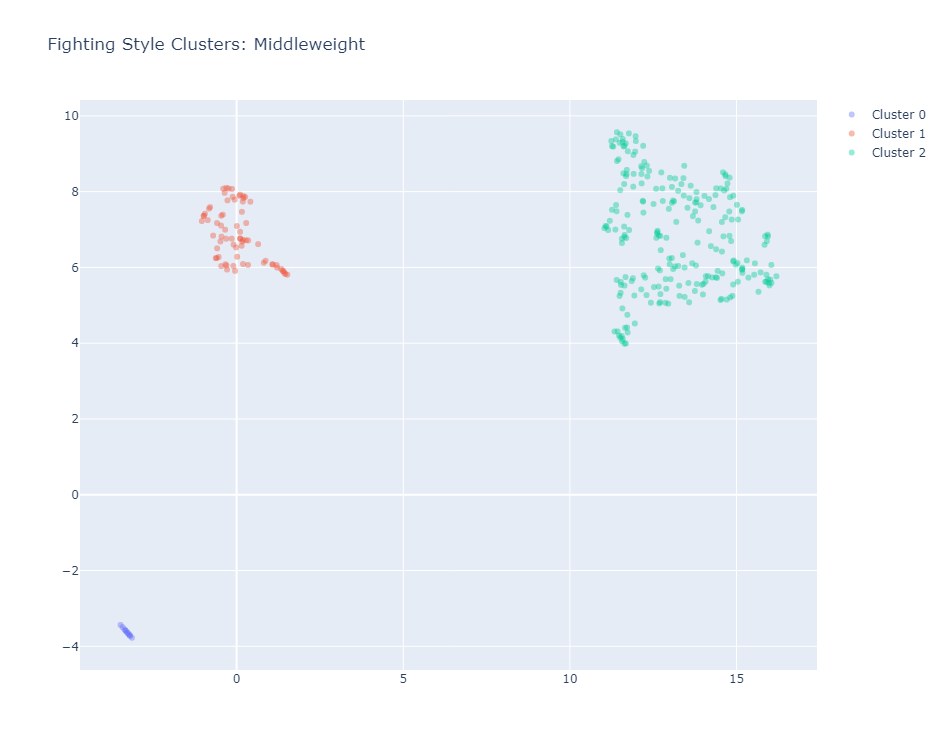

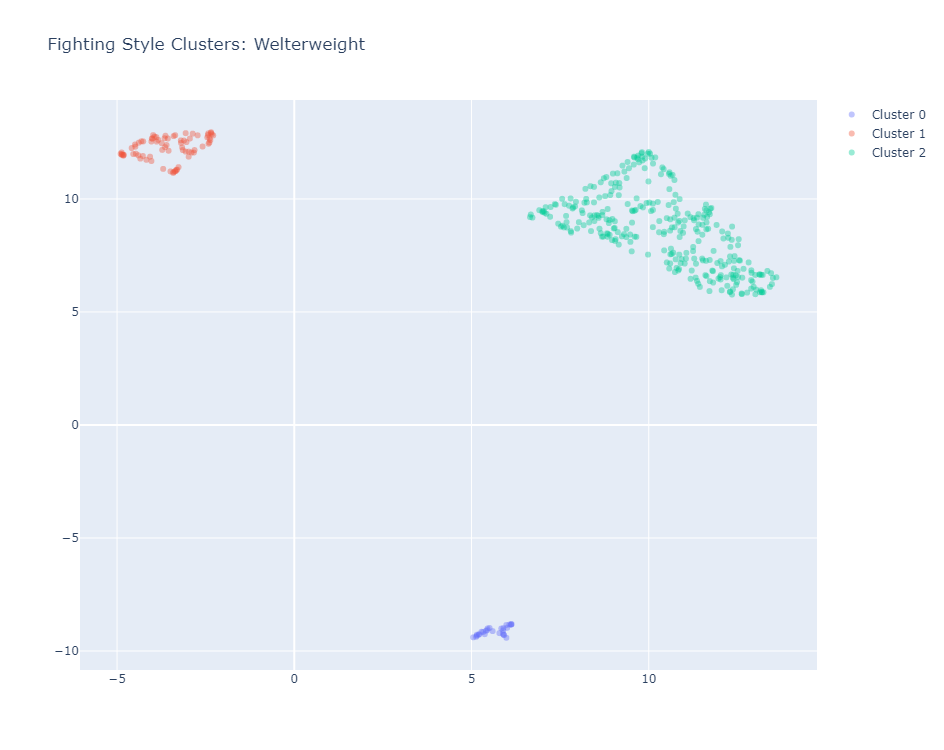

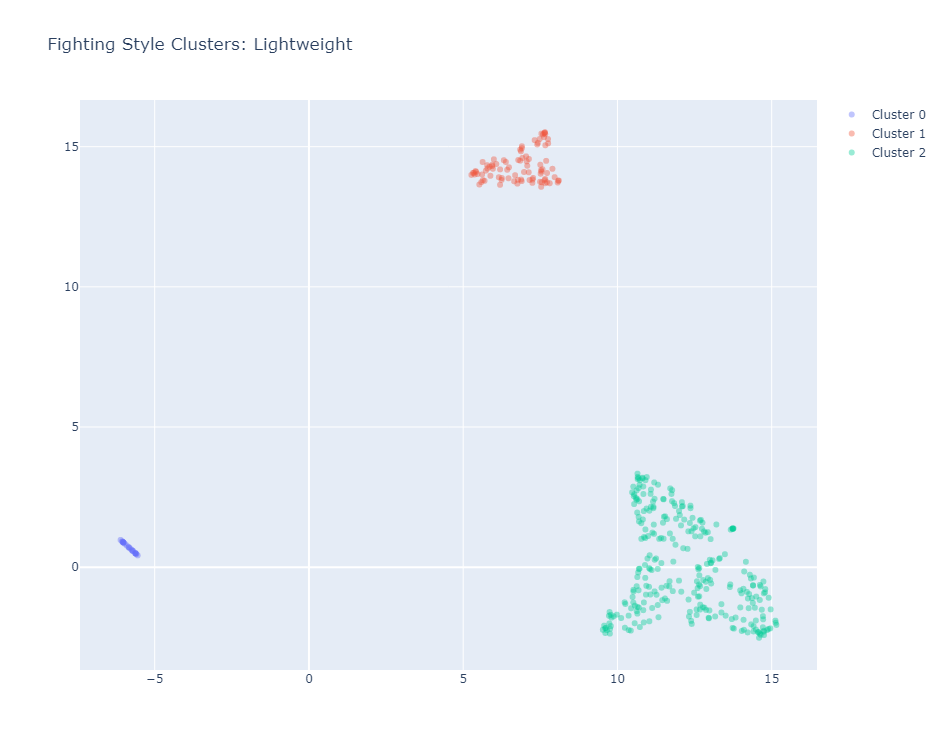

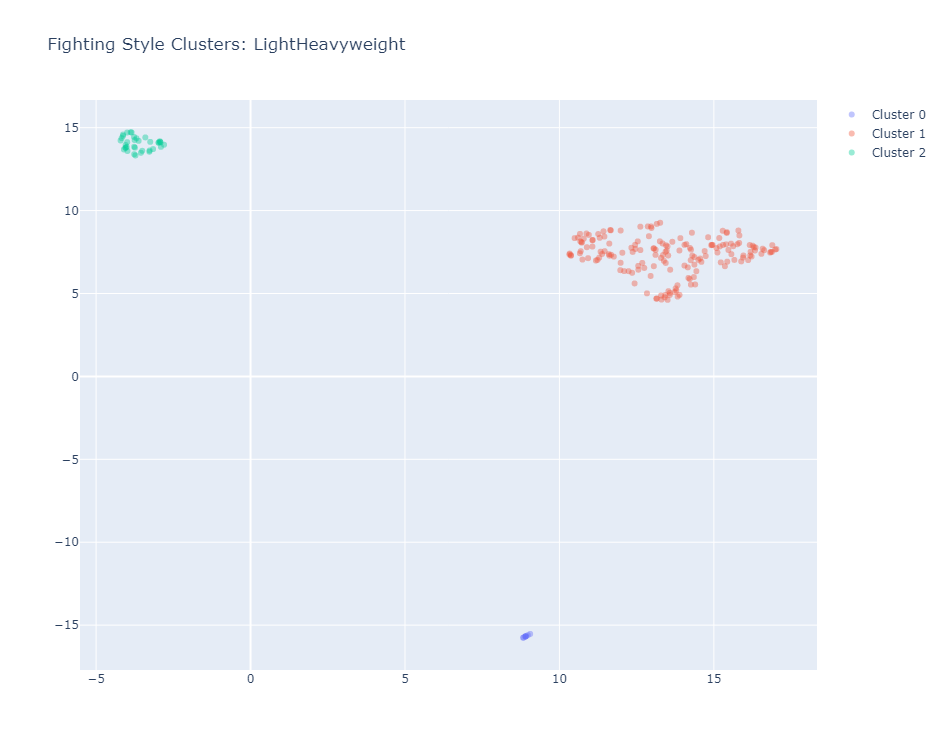

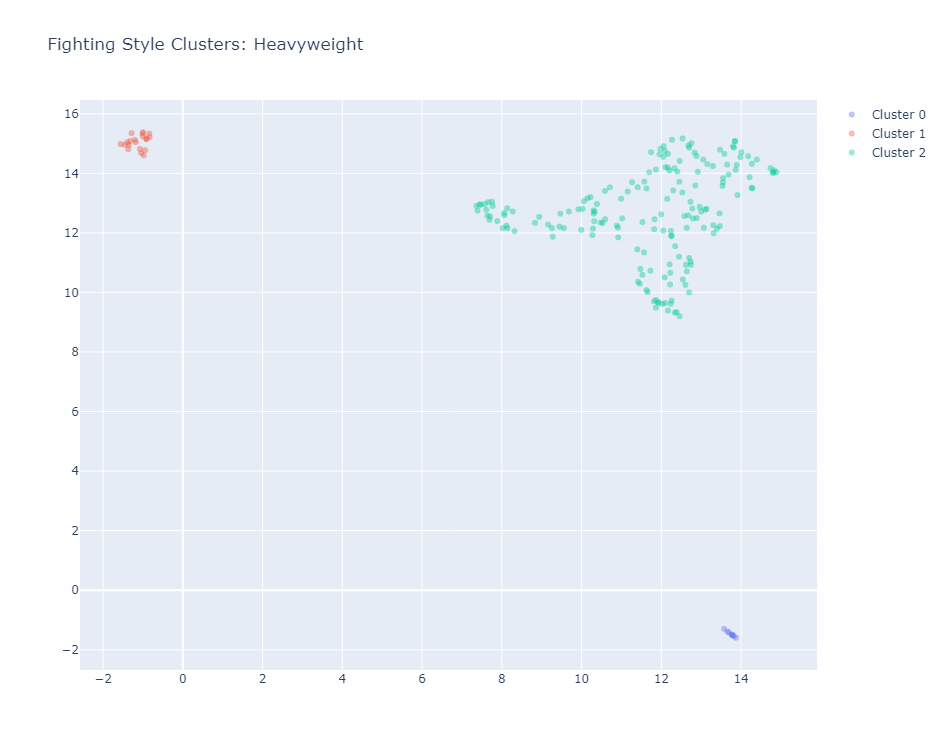

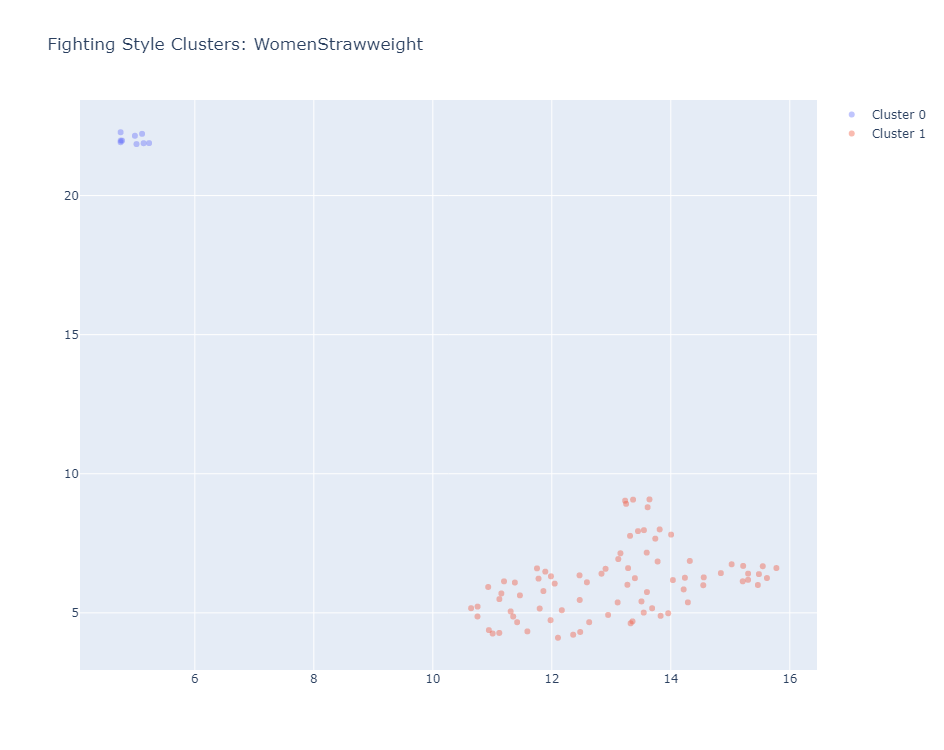

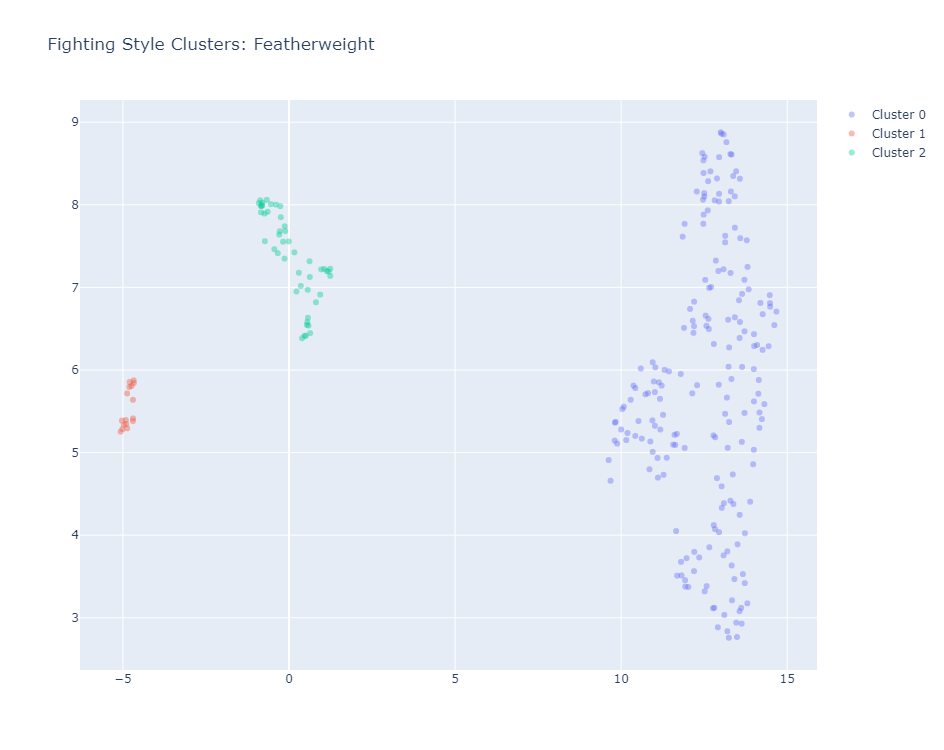

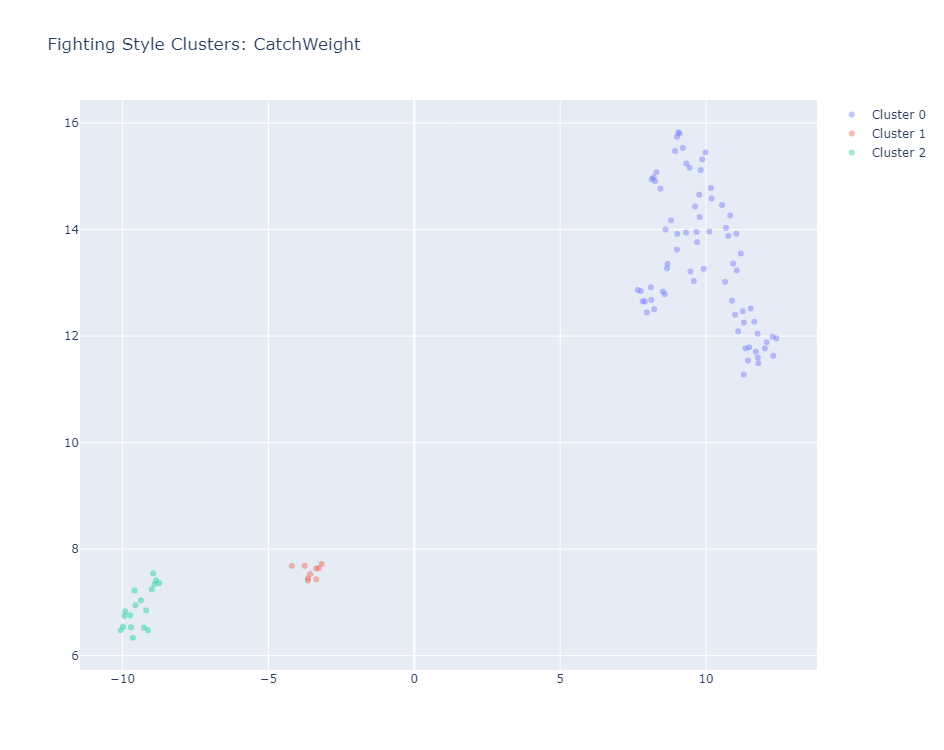

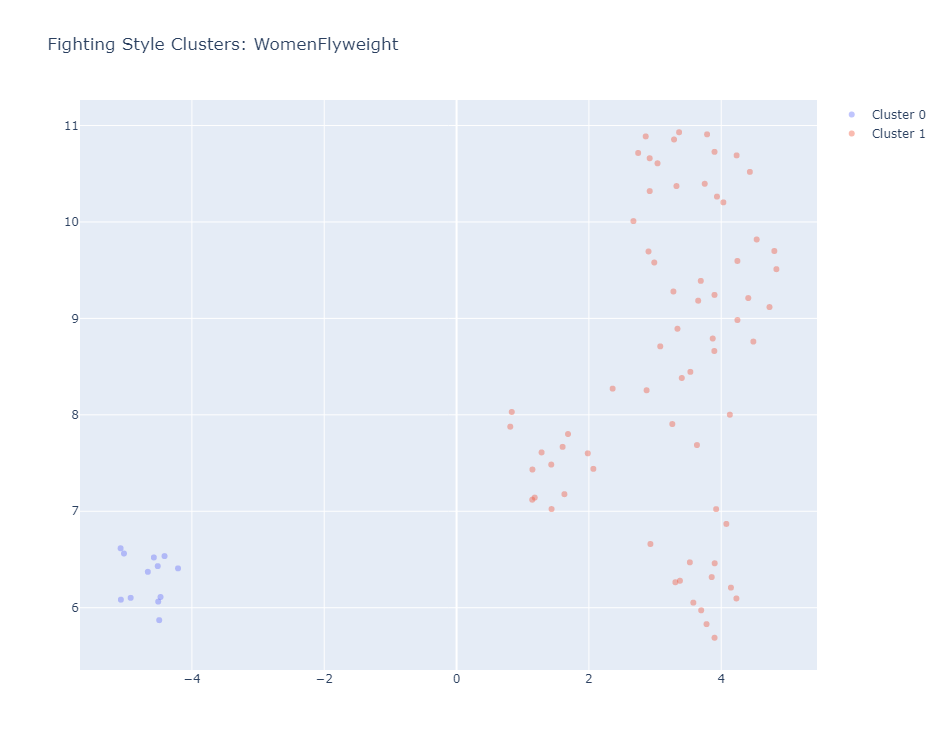

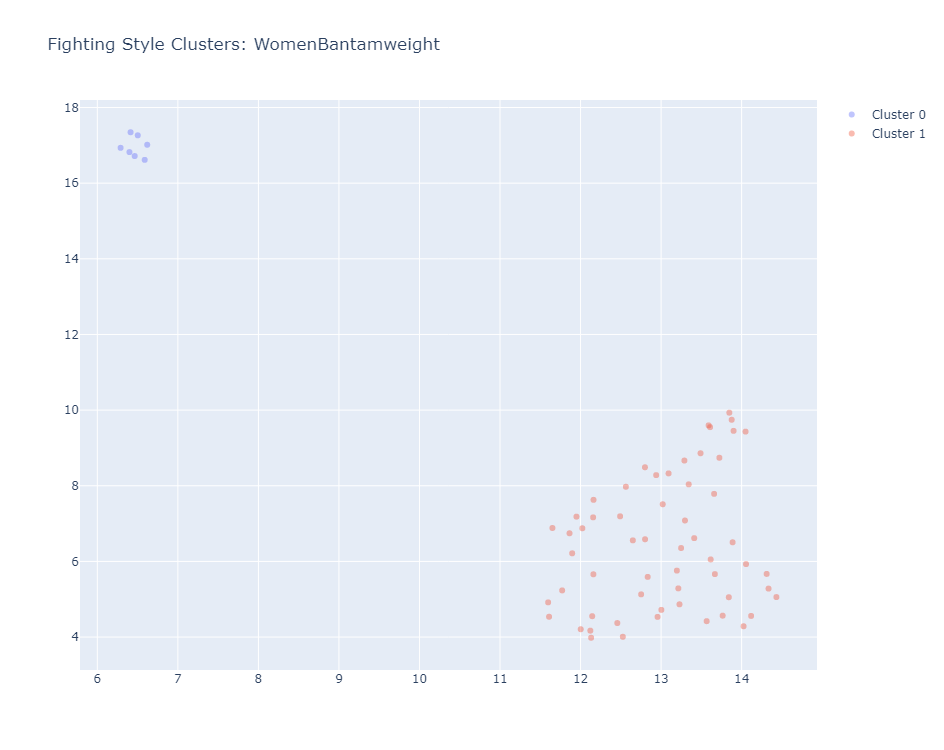

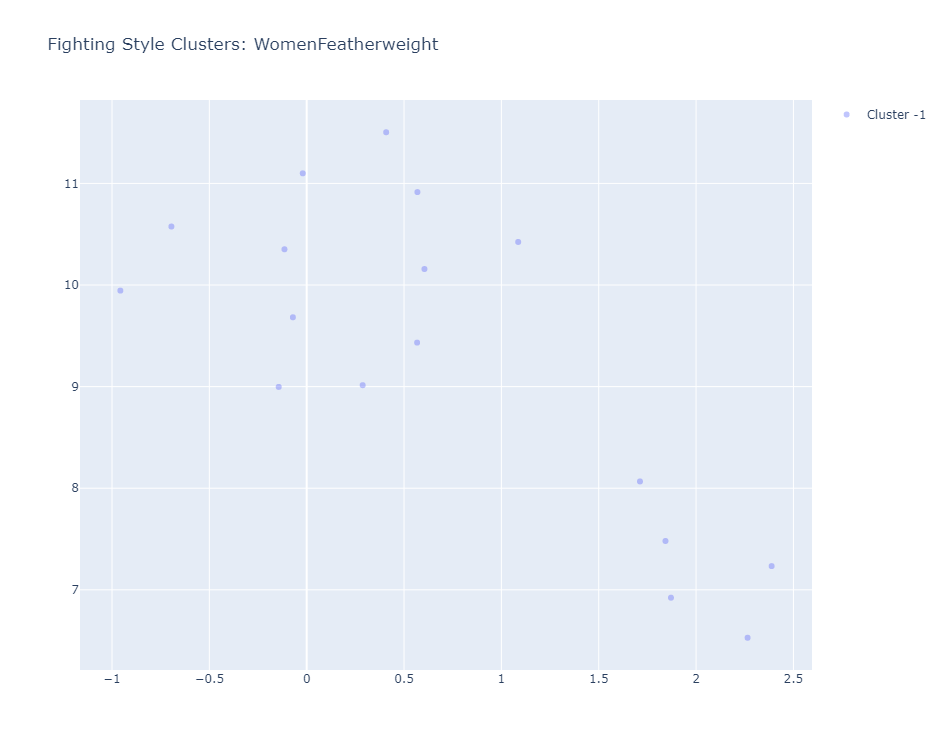

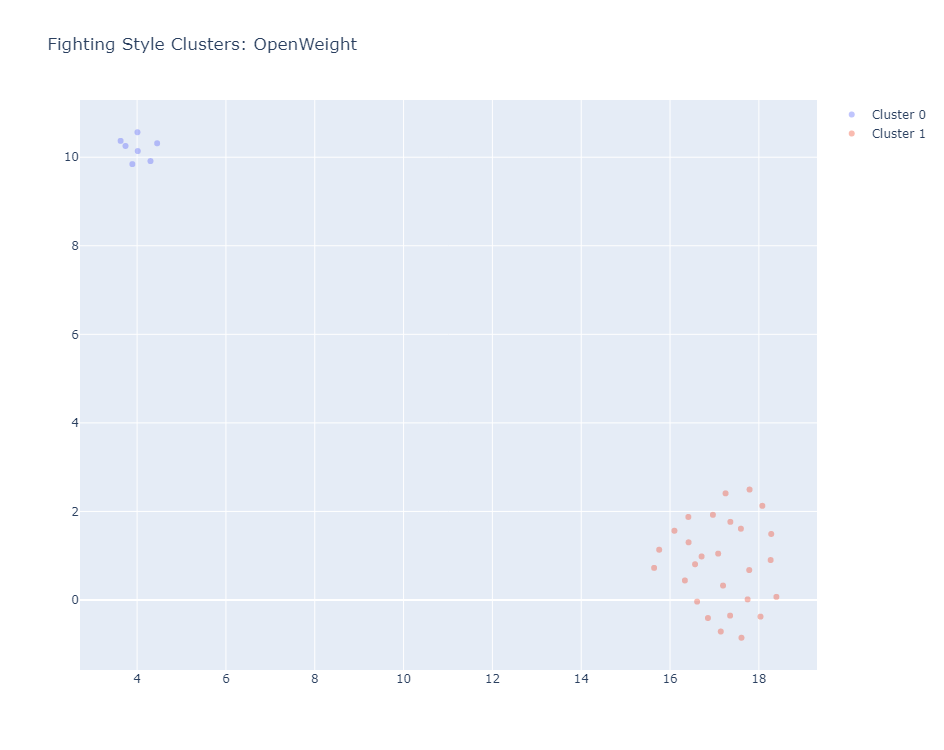

In [7]:
from scripts.cluster import ClusterAnalysis

for weight in weight_class:
    ca = ClusterAnalysis(fighters_styles_dims.loc[fighters_styles_dims['weight_class'] == weight], n_neighbors=10, min_cluster_size=5, min_dist=0.10, metric='euclidean', cluster_dims=style_dims_names, export_data=True)
    ca.run()


In [8]:
import os

directory = 'C:/Users/johna/anaconda3/envs/ufc-env/ufc_styles/data/02_intermediate'
all_fighter_clusters = pd.DataFrame()

for file in os.listdir(directory):
    if file.startswith('fighter_cluster') and file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        all_fighter_clusters = pd.concat([all_fighter_clusters, df], ignore_index=True)

all_fighter_clusters


Unnamed: 0     Fighter_dims      weight_class    avg_KD  avg_opp_KD  \
0              0     Alatengheili      Bantamweight  0.000000    0.000000   
1              1       Aoriqileng      Bantamweight  0.009061    0.018427   
2              4       Sumudaerji      Bantamweight  0.000000    0.000000   
3              6      Wulijiburen      Bantamweight  0.000000    0.010000   
4             13   Aaron Phillips      Bantamweight  0.000000    0.000000   
...          ...              ...               ...       ...         ...   
2528        3101  Virna Jandiroba  WomenStrawweight  0.002125    0.000000   
2529        3112  Viviane Pereira  WomenStrawweight  0.000000    0.000000   
2530        3161      Yan Xiaonan  WomenStrawweight  0.000000    0.000000   
2531        3172  Yazmin Jauregui  WomenStrawweight  0.000000    0.000000   
2532        3224      Zhang Weili  WomenStrawweight  0.006286    0.001575   

      avg_SUB_ATT  avg_opp_SUB_ATT   avg_REV  avg_opp_REV  avg_SIG_STR_att  \
0        0.000000         0.000000  0.000000     0.000000         0.105749   
1        0.000000         0.000000  0.000000     0.000000         0.281296   
2        0.093677         0.070258  0.234778     0.000000         0.067203   
3        0.000000         0.000000  0.000000     0.124444         0.063768   
4        0.016667         0.025000  0.083542     0.093333         0.046232   
...           ...              ...       ...          ...              ...   
2528     0.035267         0.003294  0.097166     0.054277         0.084271   
2529     0.003704         0.000000  0.000000     0.000000         0.119477   
2530     0.000000         0.008234  0.000000     0.000000         0.219156   
2531     0.000000         0.000000  0.000000     0.000000         0.231691   
2532     0.008560         0.010586  0.020548     0.011780         0.201524   

      ...  avg_opp_CTRL_time(seconds)  Stance_Open Stance  Stance_Orthodox  \
0     ...                    0.005115                 0.0              0.0   
1     ...                    0.051254                 0.0              0.0   
2     ...                    0.857608                 0.0              0.0   
3     ...                    0.135250                 0.0              0.0   
4     ...                    0.739330                 0.0              0.0   
...   ...                         ...                 ...              ...   
2528  ...                    0.241624                 0.0              1.0   
2529  ...                    0.214714                 0.0              1.0   
2530  ...                    0.271124                 0.0              1.0   
2531  ...                    0.038643                 0.0              1.0   
2532  ...                    0.080928                 0.0              0.0   

      Stance_Sideways  Stance_Southpaw  Stance_Switch          x         y  \
0                 0.0              0.0            0.0   1.548273  1.120345   
1                 0.0              0.0            0.0   1.641211  1.055614   
2                 0.0              0.0            0.0   1.312607  1.332779   
3                 0.0              0.0            0.0   1.433799  1.227394   
4                 0.0              1.0            0.0  10.481047 -2.837270   
...               ...              ...            ...        ...       ...   
2528              0.0              0.0            0.0  14.841026  6.429337   
2529              0.0              0.0            0.0  13.599037  5.747579   
2530              0.0              0.0            0.0  11.858685  5.783528   
2531              0.0              0.0            0.0  10.752129  5.225493   
2532              0.0              0.0            1.0  13.232233  9.032804   

      cluster    specific_cluster  
0           2      2_Bantamweight  
1           2      2_Bantamweight  
2           2      2_Bantamweight  
3           2      2_Bantamweight  
4           1      1_Bantamweight  
...       ...                 ...  
2528        1  1_W

In [9]:
all_fighter_clusters.to_csv(r"C:\Users\johna\anaconda3\envs\ufc-env\ufc_styles\data\02_intermediate\all_fighter_clusters.csv")